In [117]:
import numpy as np                          # using numpy to load and save csv files 
import matplotlib.pyplot as plt             # using matplotlib to plot the data 
from tqdm.auto import tqdm                  # using tqdm to show progress bar 
import matplotlib.animation as animation    # using matplotlib to animate the data

from astropy import units as u              # using astropy for units



### Parameters for the code

In [118]:
tau = (10 * u.Myr).to(u.s) # turbulent correlation time
v_rms = (10*u.km/u.s).to(u.m/u.s) # turbulent velocity
print("Correlation Length (in kpc)", (v_rms*tau).to(u.kpc))

eta = (1/3)*((tau))*((v_rms))**2 # in SI units
print(r"Diffusivity (eta) in (pc^2/Myr)", eta.to(u.pc**2/u.Myr)) # Diffusivity

h_0 = (0.5 * u.kpc).to(u.m) # scale height
print('Turbulent Diffusion Time (in Myr) =', (h_0**2/eta).to(u.Myr)) # Turbulent Diffusion Time


# Code units to make the code dimensionless
unit_time =  h_0**2/eta 
unit_length =  h_0
unit_field =  (10**(-6)*u.G)

ghost_zones = 5

# Convert to Code units
tau = tau / unit_time
v_rms = v_rms / (unit_length/unit_time)

eta = eta / (unit_length**2/unit_time)
h_0 = h_0 / unit_length

r_min = (0.1 * u.kpc).to(u.m) / unit_length
r_max = (10.0 * u.kpc).to(u.m) / unit_length

t_min = (0 * u.Gyr).to(u.s) / unit_time
t_max = (40 * u.Gyr).to(u.s) / unit_time

r_h = r_max # (2.0 * u.kpc) .to(u.m) / unit_length         # Radius scale length

omega_0 = ((170 * (u.km/(u.s*u.kpc))).to(u.m/(u.s*u.m))) * unit_time
r_omega = (2.0 * u.kpc).to(u.m) / unit_length              # Radius scale length in m

n_r = 100                                                  # Number of grid points in r
d_r = (r_max - r_min)/n_r                                  # For uniform grid in r

r_min_new = r_min - ghost_zones*d_r
r_max_new = r_max + ghost_zones*d_r
n_r_new = n_r + 2*ghost_zones+1



r = np.linspace(r_min_new, r_max_new, n_r_new)     # For uniform grid in r
dr = np.diff(r)  


n_t = 60000                            # Number of grid points in t
d_t = (t_max - t_min)/n_t              # For uniform grid in time

print('Length step =', d_r*unit_length.to(u.kpc))
print('Time step =', d_t*unit_time.to(u.Myr))

t = np.linspace(t_min, t_max, n_t)     # For uniformly spaced time intervals
dt = np.diff(t)                        # For uniformly spaced time intervals

h = h_0 * np.ones_like(r) # *  (1+(r/r_h)**2)**0.5  #                 # Assuming a flared disc

omega = omega_0/np.sqrt(1+(r/r_omega)**2)                             # Omega effect

q = - (r/omega) * np.gradient(omega, r, edge_order = 2)               # q = - (r/omega) * d omega / dr 

alpha = ( (tau)**2 * (v_rms)**2 * omega ) / (h)                       # np.ones_like(r) # 

C = 2*eta*d_t/d_r**2

print('Courant Limit = ', C)
print('velocity limit =', (d_r*unit_length/(d_t*unit_time)).to(u.km/u.s))
V_z_fact = (-2* u.km/u.s).to(u.m/u.s) # vertical velocity
V_r = (np.zeros(len(r))  * u.m/u.s ) / (unit_length/unit_time)        # radial velocity
V_phi = (np.zeros(len(r)) /u.s     ) / (unit_length/unit_time)        # angular velocity
V_z = V_z_fact.value*(np.ones(len(r))  * u.m/u.s ) / (unit_length/unit_time) 
print('V_z=', V_z_fact )       # vertical velocity
print('V_z=', V_z[0] )       # vertical velocity

Correlation Length (in kpc) 0.10227121650456951 kpc
Diffusivity (eta) in (pc^2/Myr) 348.64672417748426 pc2 / Myr
Turbulent Diffusion Time (in Myr) = 717.0582215845902 Myr
Length step = 0.09899999999999999 kpc
Time step = 0.6666666666666667 Myr
Courant Limit =  0.04743008865455692
velocity limit = 145.2021449195972 km / s
V_z= -2000.0 m / s
V_z= -2.933376665042368


In [119]:
D = - alpha* q * omega * h**(3) / eta**2    # D = - alpha q / 2 omega
print("Dynamo Number:", np.average(D)) # .to(u.m**2/u.m**2)

Dynamo Number: -71.41311694401433


In [120]:
print('r_min =',r_min)
print('r_max =',r_max)
print('t_min =',t_min)
print('t_max =',t_max)
print('h_0 =',h_0)
print('d_t =',d_t)
print('d_r =',d_r)
print('eta =',eta)
print('omega_0 =',omega_0)
print('r_omega =',r_omega)
print('alpha_0 =',np.average(alpha))
print('omega =',np.average(omega))

# print('r',r)
# print('dr',dr)
# print('h',h)
# print('t',t)
# print('dt',dt)

# print('alpha',alpha)
# print('V_r',V_r)
# print('V_phi',V_phi)
# print('V_z',V_z)

r_min = 0.2
r_max = 19.999999999999996
t_min = 0.0
t_max = 55.78347586839748
h_0 = 1.0
d_t = 0.0009297245978066247
d_r = 0.19799999999999998
eta = 1.0
omega_0 = 124.66850826430064
r_omega = 4.0
alpha_0 = 2.4538605618255995
omega = 58.652029682640915


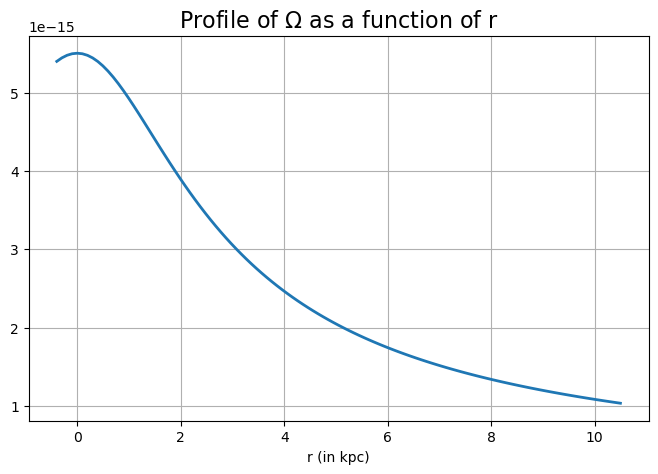

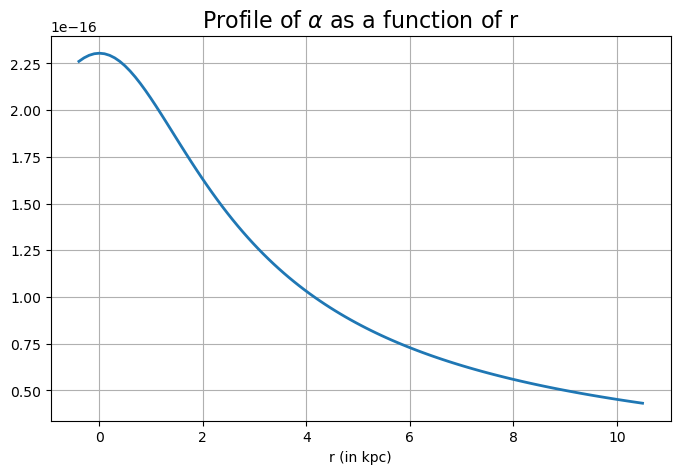

In [121]:
# plot Omega and Alpha Profile
plt.figure(figsize=(8, 5))
plt.plot(r * unit_length.to(u.kpc).value, omega/unit_time, label=r"$\Omega$", lw='2')
plt.xlabel("r (in kpc)")
plt.title(r"Profile of $\Omega$ as a function of r", fontsize=16)
# plt.legend(loc='best')
plt.grid()
plt.savefig("Omega_profile.png")
plt.show()

plt.figure(figsize=(8, 5))
plt.plot(r * unit_length.to(u.kpc).value, alpha/unit_time, label=r"$\alpha$", lw='2')
plt.xlabel("r (in kpc)")
plt.title(r"Profile of $\alpha$ as a function of r", fontsize=16)
# plt.legend(loc='best')
plt.grid()
plt.savefig("Alpha_profile.png")
plt.show()

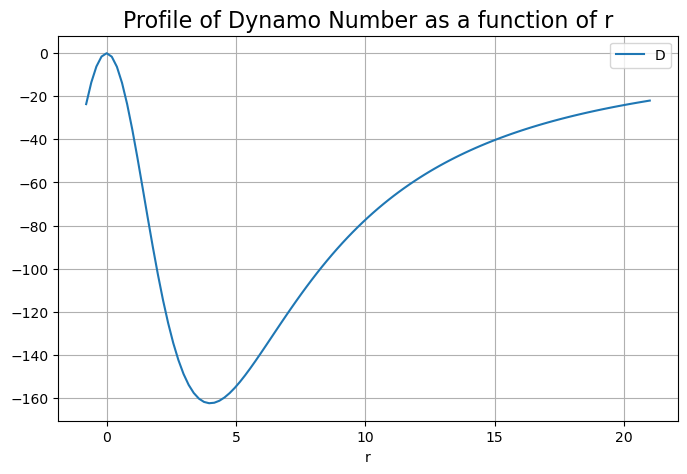

In [122]:
# plot Dynamo Profile
plt.figure(figsize=(8, 5))
plt.plot(r, D, label=r"D")
plt.xlabel("r")
plt.title(r"Profile of Dynamo Number as a function of r", fontsize=16)
plt.legend(loc='best')
plt.grid()
plt.savefig("Dynamo_profile.png")
plt.show()

In [123]:
print(V_z)

[-2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667
 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667
 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667
 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667
 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667
 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667
 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667
 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667
 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667
 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667
 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667
 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667
 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2.93337667
 -2.93337667 -2.93337667 -2.93337667 -2.93337667 -2

In [124]:
def Eqn_Br(B_r, B_phi, dr=dr, eta=eta):
    dB_dr = np.gradient(B_r, r, edge_order = 2)
    ddB_dr2 = np.gradient(dB_dr, r, edge_order = 2)

    k = d_t*( -(V_z*B_r)/(2*h) - (2*alpha*B_phi)/(np.pi*h)
              + eta*( (-np.pi**2 *B_r)/(4 * h**2) + ddB_dr2 + (1/r)*dB_dr - (B_r/r**2)  ))
    return np.array(k)

# Full Eqn in Bphi
def Eqn_Bphi(B_r, B_phi, dr=dr, eta=eta):
    dB_dr = np.gradient(B_phi, r, edge_order = 2)
    ddB_dr2 = np.gradient(dB_dr, r, edge_order = 2)
    k = d_t*( -(V_z*B_phi)/(2*h) - q*omega*B_r -
              + eta*( (-np.pi**2 *B_phi)/(4 * h**2) + ddB_dr2 + (1/r)*dB_dr - (B_phi/r**2)   ) )
    return np.array(k)

In [125]:
# # Runge Kutta Step
# def runge_kutta_step(B_r, B_phi, dt, eta=eta):
#     k1_r = dt * Eqn_Br(B_r, B_phi)
#     k1_phi = dt * Eqn_Bphi(B_r, B_phi)

#     k2_r = dt * Eqn_Br(B_r + 0.5 * k1_r, B_phi + 0.5 * k1_phi)
#     k2_phi = dt * Eqn_Bphi(B_r + 0.5 * k1_r, B_phi + 0.5 * k1_phi)

#     k3_r = dt * Eqn_Br(B_r + 0.5 * k2_r, B_phi + 0.5 * k2_phi)
#     k3_phi = dt * Eqn_Bphi(B_r + 0.5 * k2_r, B_phi + 0.5 * k2_phi)

#     k4_r = dt * Eqn_Br(B_r + k3_r, B_phi + k3_phi)
#     k4_phi = dt * Eqn_Bphi(B_r + k3_r, B_phi + k3_phi)

#     return (B_r + (k1_r + 2 * k2_r + 2 * k3_r + k4_r) / 6, B_phi + (k1_phi + 2 * k2_phi + 2 * k3_phi + k4_phi) / 6)

# region_1 = np.where(r == r_min)[0][0]
# region_2 = np.where(r == r_max)[0][0]
# 

region_1 = ghost_zones
region_2 = n_r + region_1 


def runge_kutta_step(B_r, B_phi, dt, eta=eta, region_1=region_1, region_2=region_2, ghost_zones=ghost_zones):
    k1_r = dt * Eqn_Br(B_r, B_phi)
    k1_phi = dt * Eqn_Bphi(B_r, B_phi)

    k2_r = dt * Eqn_Br(B_r + 0.5 * k1_r, B_phi + 0.5 * k1_phi)
    k2_phi = dt * Eqn_Bphi(B_r + 0.5 * k1_r, B_phi + 0.5 * k1_phi)

    k3_r = dt * Eqn_Br(B_r + 0.5 * k2_r, B_phi + 0.5 * k2_phi)
    k3_phi = dt * Eqn_Bphi(B_r + 0.5 * k2_r, B_phi + 0.5 * k2_phi)

    k4_r = dt * Eqn_Br(B_r + k3_r, B_phi + k3_phi)
    k4_phi = dt * Eqn_Bphi(B_r + k3_r, B_phi + k3_phi)

    B_r_t = B_r + (k1_r + 2 * k2_r + 2 * k3_r + k4_r) / 6
    B_phi_t = B_phi + (k1_phi + 2 * k2_phi + 2 * k3_phi + k4_phi) / 6

    # Vaccum Boundary Conditions using Ghost Zones
    for i in range(ghost_zones):
        B_r_t[region_1-1-i] = -1*B_r_t[region_1+1+i]
        B_phi_t[region_1-1-i] = -1*B_phi_t[region_1+1+i]

        B_r_t[region_1] = 0
        B_phi_t[region_1] = 0

        B_r_t[region_2] = 0
        B_phi_t[region_2] = 0        

        B_r_t[region_2+1+i] = -1*B_r_t[region_2-1-i]
        B_phi_t[region_2+1+i] = -1*B_phi_t[region_2-1-i]

    return (B_r_t, B_phi_t)


In [126]:
# # Initial conditions
# # # Purely Axis Symmetric Field with B_r = 0

# # B_r =    3*np.sin(np.pi * (r/r_max)) * (10*-3) * unit_field.value
# # B_phi = -2*np.sin(np.pi * (r/r_max)) * (10*-3) * unit_field.value


# B_r =  3* np.sin(np.pi * (r/r_max).value) * (10**(-11)) 
# # B_phi = np.ones_like(B_r) * (10**(-11)) * unit_field.value
# B_phi = -2*np.sin(np.pi * (r/r_max).value) * (10**(-11)) 

# Br_amp=1e-9 
# np.random.seed(0)
# B_r = Br_amp*np.sin((2*np.pi*((r_min - r)/(r_max-r_min)).value)) 
# B_phi  = - Br_amp*np.sin((2*np.pi*((r_min - r)/(r_max-r_min)).value))

# sinusoid
#Br_amp=1e-3 
#B_r   = Br_amp*np.sin((np.pi * ((r_min - r)/(r_max-r_min)).value)) 
#B_phi = -Br_amp*np.sin((np.pi * ((r_min - r)/(r_max-r_min)).value)) # 1e-15*np.ones_like(r.value) 

# # random Field
# B_r   = 1e-3*np.random.rand(len(r))
# B_phi = 1e-3*np.random.rand(len(r))


# Sin(r) + random
# Br_amp=1e-3 
# B_r   = 1e-5*np.random.rand(len(r)) +  Br_amp*np.sin((np.pi * ((r_min - r)/(r_max-r_min)).value)) 
# B_phi = 1e-5*np.random.rand(len(r)) +  -Br_amp*np.sin((np.pi * ((r_min - r)/(r_max-r_min)).value))

Br_amp=1e-3 
B_r   = Br_amp*np.sin((np.pi * ((r_min - r)/(r_max-r_min)).value)) * np.exp(-r**2/r_omega.value**2)
B_phi = -Br_amp*np.sin((np.pi * ((r_min - r)/(r_max-r_min)).value))* np.exp(-r**2/r_omega.value**2)


# B_r[0] = 0
# B_phi[0] = 0
# B_r[-1] = 0
# B_phi[-1] = 0

# print(r[-1])
# print(r_max)

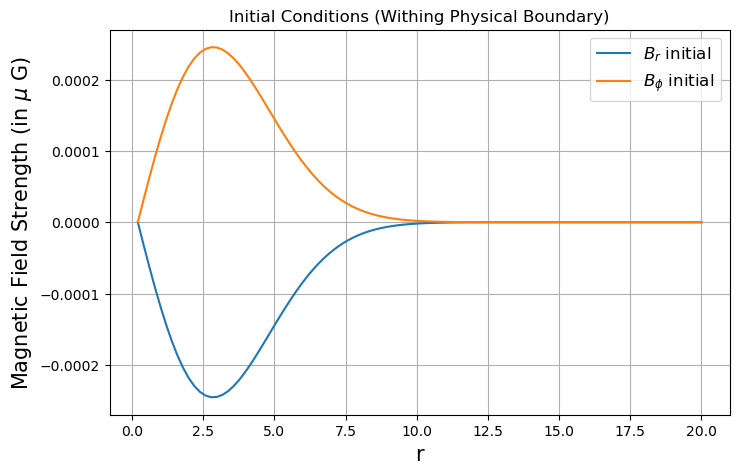

In [127]:
plt.figure(figsize=(8, 5))

plt.xlabel("Radius (in kpc)", fontsize=15)
plt.ylabel(r"Magnetic Field Strength (in $\mu$ G)", fontsize=15)

plt.plot(r[region_1:region_2+1],   B_r[region_1:region_2+1], label=r"$B_r$ initial")
plt.plot(r[region_1:region_2+1], B_phi[region_1:region_2+1], label=r"$B_\phi$ initial")
plt.title("Initial Conditions (Withing Physical Boundary)")
plt.xlabel("r")
plt.legend(fontsize=12)
plt.savefig("Initial_Conditions.jpg", dpi =600, bbox_inches='tight')
plt.grid()
plt.show()

In [128]:
# Time-stepping scheme using Runge-Kutta
B_r_t = B_r
B_phi_t = B_phi

time_evol = [[B_r],[B_phi]]

for i in tqdm(range(len(dt)-1)):
# for i in [0]:
    time_step = dt[i]
    B_r_t,B_phi_t = runge_kutta_step(time_evol[0][-1], time_evol[1][-1], dt=time_step)

    # if i%50 == 0:
    #     # Plotting the final conditions.
    #     plt.figure(figsize=(8, 5))

    #     plt.xlabel("Radius (in kpc)", fontsize=15)
    #     plt.ylabel(r"Magnetic Field Strength (in $\mu$ G)", fontsize=15)

    #     plt.plot(r[region_1:region_2+1],   B_r_t[region_1:region_2+1], label=r"$B_r$ initial")
    #     plt.plot(r[region_1:region_2+1], B_phi_t[region_1:region_2+1], label=r"$B_\phi$ initial")
    #     plt.title("Final Conditions (Within Physical Boundary)")
    #     plt.xlabel("r")
    #     plt.legend(fontsize=12)
    #     plt.savefig("Final_Conditions_temp"+str(i//5000)+".jpg", dpi =600, bbox_inches='tight')
    #     plt.grid()
    #     plt.show()
    
    time_evol[0].append(B_r_t)
    time_evol[1].append(B_phi_t)

100%|██████████| 59998/59998 [05:58<00:00, 167.15it/s]


In [129]:
B_r_ev = []
B_phi_ev = []

for i in range(len(time_evol[0])):
    if i%100 == 0:
        B_r_ev.append(time_evol[0][i])
        B_phi_ev.append( time_evol[1][i])

B_r_evolution = np.array(B_r_ev)
B_phi_evolution = np.array(B_phi_ev)


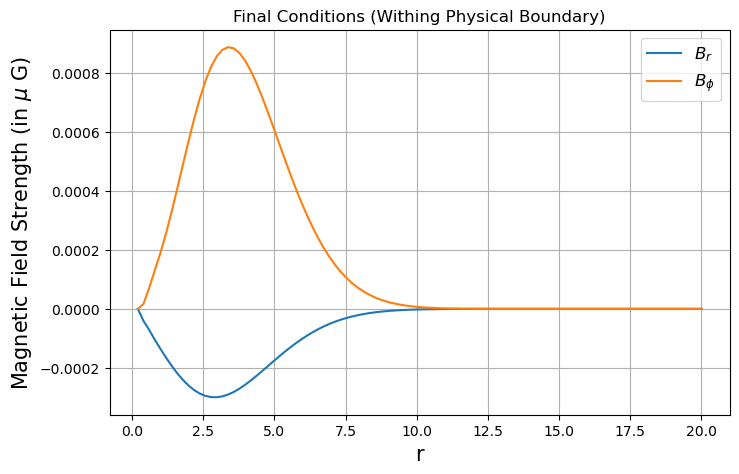

In [130]:
# Plotting the final conditions.
plt.figure(figsize=(8, 5))

plt.xlabel("Radius (in kpc)", fontsize=15)
plt.ylabel(r"Magnetic Field Strength (in $\mu$ G)", fontsize=15)

plt.plot(r[region_1:region_2+1],   B_r_t[region_1:region_2+1], label=r"$B_r$")
plt.plot(r[region_1:region_2+1], B_phi_t[region_1:region_2+1], label=r"$B_\phi$")
plt.title("Final Conditions (Withing Physical Boundary)")
plt.xlabel("r")
plt.legend(fontsize=12)
plt.savefig("Initial_Conditions.jpg", dpi =600, bbox_inches='tight')
plt.grid()
plt.show()

In [131]:
len(r)

111

In [132]:
import pickle

data_pos = {'r':r[ghost_zones:-ghost_zones], 'B_r':B_r_evolution[-1][ghost_zones:-ghost_zones], 'B_phi':B_phi_evolution[-1][ghost_zones:-ghost_zones]}

filename = 'data_neg.pkl'

with open(filename, 'wb') as f:
    pickle.dump(data_pos, f)

In [133]:
# r = r * unit_length.to(u.kpc).value
# t = t * unit_time.to(u.Myr).value

B_r_t = B_r_t # * unit_field.value
B_phi_t = B_phi_t # * unit_field.value

time_evol = np.array(time_evol) # * unit_field.value

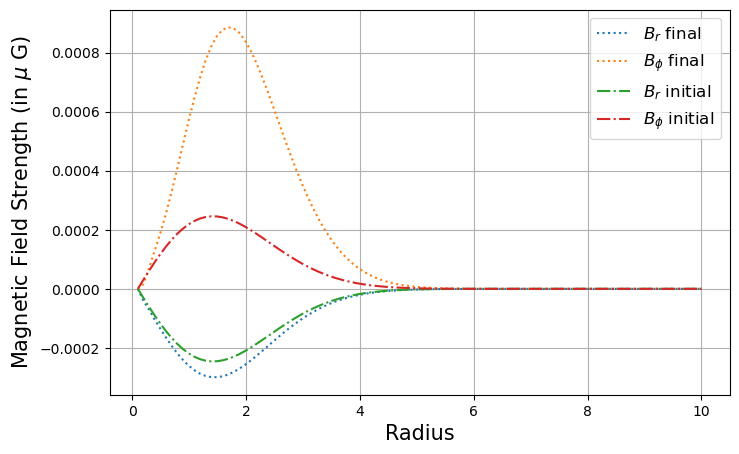

In [134]:
# Plotting the final conditions
plt.figure(figsize=(8, 5))

plt.xlabel("Radius", fontsize=15)
plt.ylabel(r"Magnetic Field Strength (in $\mu$ G)", fontsize=15)

plt.plot(r[region_1:region_2+1] * unit_length.to(u.kpc),   B_r_t[region_1:region_2+1], label=r"$B_r$ final", ls =':')
plt.plot(r[region_1:region_2+1] * unit_length.to(u.kpc), B_phi_t[region_1:region_2+1], label=r"$B_\phi$ final", ls=':')
plt.plot(r[region_1:region_2+1] * unit_length.to(u.kpc),     B_r[region_1:region_2+1], label=r"$B_r$ initial", ls='-.')
plt.plot(r[region_1:region_2+1] * unit_length.to(u.kpc),   B_phi[region_1:region_2+1], label=r"$B_\phi$ initial", ls="-.")
plt.legend(fontsize=12)
plt.savefig("Final_Conditions.jpg", dpi =600, bbox_inches='tight')
plt.grid()
plt.show()

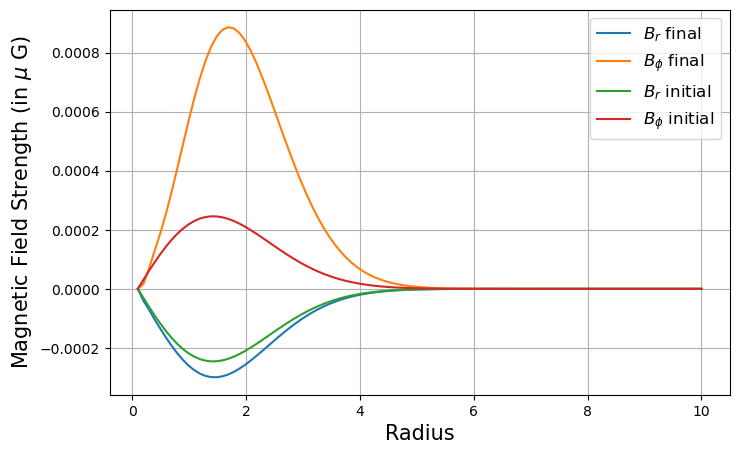

In [135]:
# Plotting the final conditions
plt.figure(figsize=(8, 5))

plt.xlabel("Radius", fontsize=15)
plt.ylabel(r"Magnetic Field Strength (in $\mu$ G)", fontsize=15)

plt.plot(r[region_1:region_2+1] * unit_length.to(u.kpc),   B_r_t[region_1:region_2+1], label=r"$B_r$ final")
plt.plot(r[region_1:region_2+1] * unit_length.to(u.kpc), B_phi_t[region_1:region_2+1], label=r"$B_\phi$ final")
plt.plot(r[region_1:region_2+1] * unit_length.to(u.kpc),     B_r[region_1:region_2+1], label=r"$B_r$ initial")
plt.plot(r[region_1:region_2+1] * unit_length.to(u.kpc),   B_phi[region_1:region_2+1], label=r"$B_\phi$ initial")
plt.legend(fontsize=12)
plt.savefig("Final_Conditions.jpg", dpi =600, bbox_inches='tight')
# plt.ylim(-0.01, 0.02)
plt.grid()
plt.show()

In [136]:
B_r_t[ghost_zones:-ghost_zones]

<Quantity [ 0.00000000e+00, -4.06824851e-05, -7.09106709e-05,
           -1.04407328e-04, -1.35160511e-04, -1.65097020e-04,
           -1.92890788e-04, -2.18256425e-04, -2.40654998e-04,
           -2.59730993e-04, -2.75198207e-04, -2.86886061e-04,
           -2.94735711e-04, -2.98799945e-04, -2.99233790e-04,
           -2.96280674e-04, -2.90255147e-04, -2.81524103e-04,
           -2.70487987e-04, -2.57563147e-04, -2.43166126e-04,
           -2.27700363e-04, -2.11545503e-04, -1.95049303e-04,
           -1.78522008e-04, -1.62232957e-04, -1.46409128e-04,
           -1.31235327e-04, -1.16855702e-04, -1.03376285e-04,
           -9.08682905e-05, -7.93719166e-05, -6.89004236e-05,
           -5.94443123e-05, -5.09754380e-05, -4.34509406e-05,
           -3.68168934e-05, -3.10116058e-05, -2.59685376e-05,
           -2.16188023e-05, -1.78932608e-05, -1.47242153e-05,
           -1.20467287e-05, -9.79960289e-06, -7.92605301e-06,
           -6.37411943e-06, -5.09685908e-06, -4.05235717e-06,
        

In [137]:
len(B_r_t[ghost_zones:-ghost_zones])

101

In [138]:
import pickle

dict = {'r': r[ghost_zones:-ghost_zones] *unit_length.to(u.kpc), 'B_r': B_r_t[ghost_zones:-ghost_zones], 'B_phi': B_phi_t[ghost_zones:-ghost_zones]}




In [139]:
# T = 0
time_evol[0][0][region_1], time_evol[0][0][region_2], time_evol[1][0][region_1], time_evol[1][0][region_2]

(8.78575686180644e-21,
 -1.700782600096643e-30,
 -8.78575686180644e-21,
 1.700782600096643e-30)

In [140]:
# T = -1
time_evol[0][-1][region_1], time_evol[0][-1][region_2], time_evol[1][-1][region_1], time_evol[1][-1][region_2]

(0.0, 0.0, 0.0, 0.0)

In [141]:
mean_field = [np.mean(np.sqrt(B_r**2 + B_phi**2)) for B_r, B_phi in zip(time_evol[0], time_evol[1])]

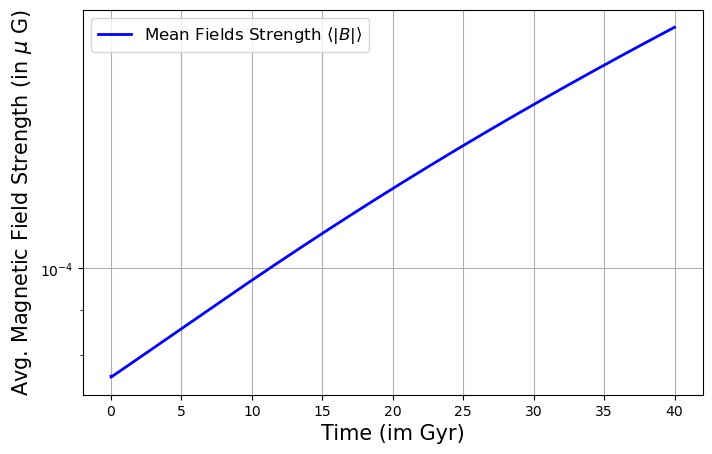

In [142]:
plt.figure(figsize=(8, 5))
plt.xlabel("Time (im Gyr)", fontsize=15)
plt.ylabel(r"Avg. Magnetic Field Strength (in $\mu$ G)", fontsize=15)
plt.plot( t[:-1]*unit_time.to(u.Gyr), np.array(mean_field), c='b', linewidth=2, label=r"Mean Fields Strength $\langle|B|\rangle$" )
plt.legend(fontsize=12)
plt.yscale('log')
plt.grid()
plt.savefig("Br_Time_Evolution.jpg", dpi =600, bbox_inches='tight')
plt.show()

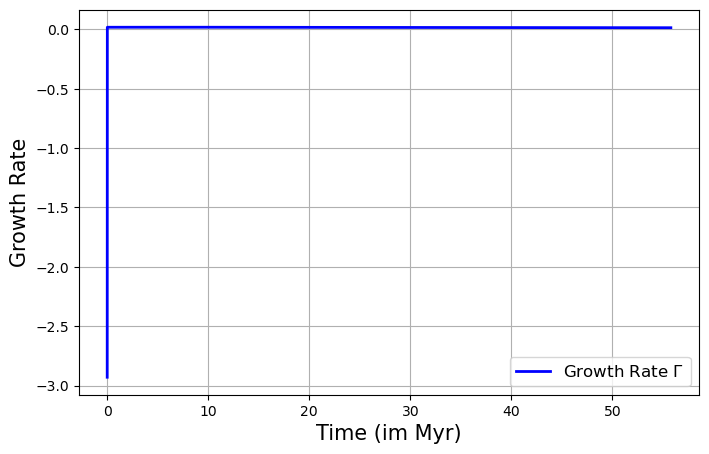

In [143]:
Gamma = np.gradient(np.log(mean_field), t[:-1])
plt.figure(figsize=(8, 5))
plt.xlabel("Time (im Myr)", fontsize=15)
plt.ylabel("Growth Rate", fontsize=15)
plt.plot(t[:-1], Gamma, c='b', linewidth=2,  label=r"Growth Rate $\Gamma$")
plt.legend(fontsize=12)
plt.grid()
plt.savefig("Growth_Rate.jpg", dpi =600, bbox_inches='tight')
plt.show()

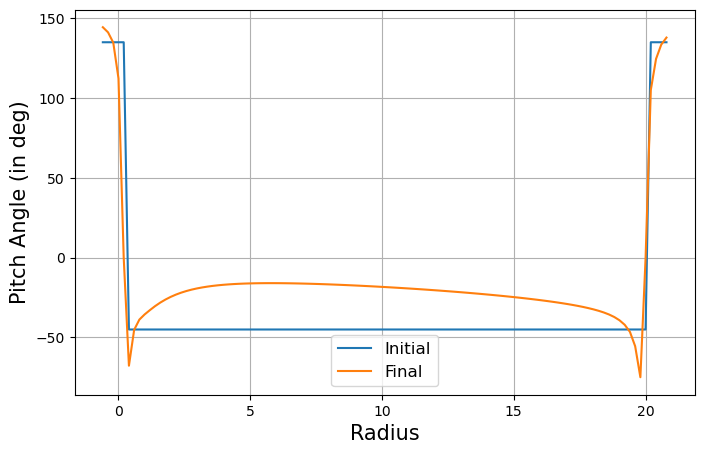

In [144]:
def pitch_angle(B_r, B_phi):
    return np.degrees( np.arctan2(B_r,B_phi) )

plt.figure(figsize=(8, 5))
plt.xlabel("Radius", fontsize=15)
plt.ylabel("Pitch Angle (in deg)", fontsize=15)

plt.plot(r[1:-1], pitch_angle(B_r, B_phi)[1:-1], label="Initial")
plt.plot(r[1:-1], pitch_angle(B_r_t, B_phi_t)[1:-1], label="Final")
plt.legend(fontsize=12)
plt.grid()
plt.savefig("Pitch_Angle.jpg", dpi =600, bbox_inches='tight')
plt.show()